### Association of Tennis Professional EDA
#### Reference: https://www.kaggle.com/datasets/sijovm/atpdata/data

In [1]:
#Load libraries
import pandas as pd
import numpy as np
import warnings
from datetime import timedelta
import seaborn as sns
import matplotlib.pyplot as plt 

sns.set_palette("bright")
warnings.filterwarnings('ignore')

#Read in the data
matches = pd.read_csv("https://raw.githubusercontent.com/statzenthusiast921/ATP_Analysis/main/main/data/atp_matches_till_2022.csv")
players = pd.read_csv("https://raw.githubusercontent.com/statzenthusiast921/ATP_Analysis/main/main/data/atp_players_till_2022.csv")
ranking = pd.read_csv("https://raw.githubusercontent.com/statzenthusiast921/ATP_Analysis/main/main/data/atp_rankings_till_2022.csv")

print(matches.shape)
print(players.shape)
print(ranking.shape)

(188161, 49)
(58687, 8)
(3113261, 4)


In [2]:
matches.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,1968-2029,Dublin,Grass,32,A,19680708,270,112411,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1968-2029,Dublin,Grass,32,A,19680708,271,126914,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1968-2029,Dublin,Grass,32,A,19680708,272,209523,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1968-2029,Dublin,Grass,32,A,19680708,273,100084,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1968-2029,Dublin,Grass,32,A,19680708,274,100132,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
matches.columns

Index(['tourney_id', 'tourney_name', 'surface', 'draw_size', 'tourney_level',
       'tourney_date', 'match_num', 'winner_id', 'winner_seed', 'winner_entry',
       'winner_name', 'winner_hand', 'winner_ht', 'winner_ioc', 'winner_age',
       'loser_id', 'loser_seed', 'loser_entry', 'loser_name', 'loser_hand',
       'loser_ht', 'loser_ioc', 'loser_age', 'score', 'best_of', 'round',
       'minutes', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon',
       'w_SvGms', 'w_bpSaved', 'w_bpFaced', 'l_ace', 'l_df', 'l_svpt',
       'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved', 'l_bpFaced',
       'winner_rank', 'winner_rank_points', 'loser_rank', 'loser_rank_points'],
      dtype='object')

In [4]:
players.head()

,player_id,name_first,name_last,hand,dob,ioc,height,wikidata_id
0,100001,Gardnar,Mulloy,R,19131122.0,USA,185.0,Q54544
1,100002,Pancho,Segura,R,19210620.0,ECU,168.0,Q54581
2,100003,Frank,Sedgman,R,19271002.0,AUS,180.0,Q962049
3,100004,Giuseppe,Merlo,R,19271011.0,ITA,NaN,Q1258752
4,100005,Richard,Gonzalez,R,19280509.0,USA,188.0,Q53554


In [5]:
ranking.head()

,ranking_date,rank,player,points
0,20100104,1,103819,10550.0
1,20100104,2,104745,9205.0
2,20100104,3,104925,8310.0
3,20100104,4,104918,7030.0
4,20100104,5,105223,6785.0


In [6]:
#Rearrange matches data to have wins and losses partition
win_matches = matches.iloc[:,np.r_[0:15,23:36,45:47]]
lose_matches = matches.iloc[:,np.r_[0:7,15:27,36:45,47:49]]

print(win_matches.shape)
print(lose_matches.shape)

(188161, 30)
(188161, 30)


In [7]:
win_matches = win_matches.rename(
    columns={
        'winner_id':'player_id',
        'winner_seed':'player_seed',
        'winner_entry':'player_entry',
        'winner_name':'player_name',
        'winner_hand':'player_hand',
        'winner_ht':'player_ht',
        'winner_ioc':'player_ioc',
        'winner_age':'player_age',
        'w_ace':'num_aces',
        'w_df':'num_dfs',
        'w_svpt':'num_svpts',
        'w_1stIn':'serve1_in_perc',
        'w_1stWon':'serve1_win_perc',
        'w_2ndWon':'serve2_win_perc',
        'w_SvGms':'num_games_served',
        'w_bpSaved':'num_brkpts_saved',
        'w_bpFaced':'num_brkpts_faced',
        'winner_rank':'rank',
        'winner_rank_points':'rank_points'
    }
)

win_matches['outcome'] = 1

In [8]:
lose_matches = lose_matches.rename(
    columns={
        'loser_id':'player_id',
        'loser_seed':'player_seed',
        'loser_entry':'player_entry',
        'loser_name':'player_name',
        'loser_hand':'player_hand',
        'loser_ht':'player_ht',
        'loser_ioc':'player_ioc',
        'loser_age':'player_age',
        'l_ace':'num_aces',
        'l_df':'num_dfs',
        'l_svpt':'num_svpts',
        'l_1stIn':'serve1_in_perc',
        'l_1stWon':'serve1_win_perc',
        'l_2ndWon':'serve2_win_perc',
        'l_SvGms':'num_games_served',
        'l_bpSaved':'num_brkpts_saved',
        'l_bpFaced':'num_brkpts_faced',
        'loser_rank':'rank',
        'loser_rank_points':'rank_points'
    }
)

lose_matches['outcome'] = 0

In [9]:
#Stack wins and losses data
matches = pd.concat([win_matches, lose_matches], ignore_index=True, axis=0)
matches.shape

(376322, 31)

In [10]:
matches['year'] = matches['tourney_id'].str[0:4].astype(int)
matches.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,player_id,player_seed,player_entry,...,serve1_in_perc,serve1_win_perc,serve2_win_perc,num_games_served,num_brkpts_saved,num_brkpts_faced,rank,rank_points,outcome,year
0,1968-2029,Dublin,Grass,32,A,19680708,270,112411,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1968
1,1968-2029,Dublin,Grass,32,A,19680708,271,126914,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1968
2,1968-2029,Dublin,Grass,32,A,19680708,272,209523,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1968
3,1968-2029,Dublin,Grass,32,A,19680708,273,100084,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1968
4,1968-2029,Dublin,Grass,32,A,19680708,274,100132,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1968


#### Which players had most weeks ranked as #1?

In [11]:
ranking['year'] = ranking['ranking_date'].astype(str).str[:4]
ranking['ranking_date'] = pd.to_datetime(ranking['ranking_date'].astype(str), format='%Y%m%d')
ranking = ranking.rename(columns={'player':'player_id'})
ranking1 = ranking[ranking['rank']==1]
ranking1.head()

,ranking_date,rank,player_id,points,year
0,2010-01-04,1,103819,10550.0,2010
1812,2010-01-11,1,103819,10550.0,2010
3626,2010-01-18,1,103819,10550.0,2010
5439,2010-01-25,1,103819,10550.0,2010
7252,2010-02-01,1,103819,11350.0,2010


In [12]:
weeks_at_1 = pd.DataFrame(ranking1.groupby('player_id')['rank'].sum()).reset_index()
weeks_at_1 = weeks_at_1.rename(columns={'rank': 'count'})
weeks_at_1 = weeks_at_1.sort_values(by = 'count', ascending=False)
weeks_at_1.head(5)

,player_id,count
25,104925,332
21,103819,307
12,101948,285
5,100656,228
23,104745,193


In [13]:
plyrs = players[['player_id','name_first','name_last','hand','ioc','dob','height']]

In [14]:
weeks_at_1_with_names = pd.merge(weeks_at_1, plyrs, on='player_id', how='inner')
weeks_at_1_with_names.head(10)

,player_id,count,name_first,name_last,hand,ioc,dob,height
0,104925,332,Novak,Djokovic,R,SRB,19870522.0,188.0
1,103819,307,Roger,Federer,R,SUI,19810808.0,185.0
2,101948,285,Pete,Sampras,R,USA,19710812.0,185.0
3,100656,228,Ivan,Lendl,R,USA,19600307.0,188.0
4,104745,193,Rafael,Nadal,L,ESP,19860603.0,185.0
5,100581,136,John,McEnroe,L,USA,19590216.0,180.0
6,100284,104,Jimmy,Connors,L,USA,19520902.0,178.0
7,101736,100,Andre,Agassi,R,USA,19700429.0,180.0
8,100437,94,Bjorn,Borg,R,SWE,19560606.0,180.0
9,103720,80,Lleyton,Hewitt,R,AUS,19810224.0,180.0


#### Longest tenures ranked as #1 (Right vs. Left Handed)

In [15]:
right = weeks_at_1_with_names[weeks_at_1_with_names['hand']=="R"]
left = weeks_at_1_with_names[weeks_at_1_with_names['hand']=="L"]

In [16]:
right.head(5)

,player_id,count,name_first,name_last,hand,ioc,dob,height
0,104925,332,Novak,Djokovic,R,SRB,19870522.0,188.0
1,103819,307,Roger,Federer,R,SUI,19810808.0,185.0
2,101948,285,Pete,Sampras,R,USA,19710812.0,185.0
3,100656,228,Ivan,Lendl,R,USA,19600307.0,188.0
7,101736,100,Andre,Agassi,R,USA,19700429.0,180.0


In [17]:
left.head(5)

,player_id,count,name_first,name_last,hand,ioc,dob,height
4,104745,193,Rafael,Nadal,L,ESP,19860603.0,185.0
5,100581,136,John,McEnroe,L,USA,19590216.0,180.0
6,100284,104,Jimmy,Connors,L,USA,19520902.0,178.0
23,102701,6,Marcelo,Rios,L,CHI,19751226.0,175.0
24,101404,6,Thomas,Muster,L,AUT,19671002.0,180.0


### Longest tenures ranked as #1 by country

In [18]:
usa = weeks_at_1_with_names[weeks_at_1_with_names['ioc']=="USA"]
spain = weeks_at_1_with_names[weeks_at_1_with_names['ioc']=="ESP"]

usa.head(5)

,player_id,count,name_first,name_last,hand,ioc,dob,height
2,101948,285,Pete,Sampras,R,USA,19710812.0,185.0
3,100656,228,Ivan,Lendl,R,USA,19600307.0,188.0
5,100581,136,John,McEnroe,L,USA,19590216.0,180.0
6,100284,104,Jimmy,Connors,L,USA,19520902.0,178.0
7,101736,100,Andre,Agassi,R,USA,19700429.0,180.0


In [19]:
spain.head(5)

,player_id,count,name_first,name_last,hand,ioc,dob,height
4,104745,193,Rafael,Nadal,L,ESP,19860603.0,185.0
15,207989,16,Carlos,Alcaraz,R,ESP,20030505.0,185.0
21,103507,8,Juan Carlos,Ferrero,R,ESP,19800212.0,183.0
25,102845,2,Carlos,Moya,R,ESP,19760827.0,190.0


### Which country had the most players ranked at #1?

In [20]:
country_counts = weeks_at_1_with_names[['ioc','player_id']]
country_counts = pd.DataFrame(weeks_at_1_with_names.groupby('ioc')['player_id'].count()).reset_index()

country_counts = country_counts.rename(columns={
    'ioc': 'country',
    'player_id':'count'
})
country_counts = country_counts.sort_values(by = 'count', ascending=False)
country_counts.head()

,country,count
12,USA,7
4,ESP,4
0,AUS,3
8,RUS,3
11,SWE,3


### Pull out game data from matches

In [21]:
#1.) Break out into wins and losses
#2.) Pull out separate game data
#3.) Pull datasets back together

In [22]:
#Convert walkover results to NAs
values_to_replace = ['W/O','Walkover','W/O']
matches['score'] = matches['score'].replace(values_to_replace, 0)

In [23]:
matches["sets"] = matches["score"].str.split(" ", n = 5, expand = False)
matches['set1_score'] = matches['sets'].str[0]
matches['set2_score'] = matches['sets'].str[1]
matches['set3_score'] = matches['sets'].str[2]
matches['set4_score'] = matches['sets'].str[3]
matches['set5_score'] = matches['sets'].str[4]

matches.head(3)

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,player_id,player_seed,player_entry,...,rank,rank_points,outcome,year,sets,set1_score,set2_score,set3_score,set4_score,set5_score
0,1968-2029,Dublin,Grass,32,A,19680708,270,112411,NaN,NaN,...,NaN,NaN,1,1968,"[6-1, 7-5]",6-1,7-5,NaN,NaN,NaN
1,1968-2029,Dublin,Grass,32,A,19680708,271,126914,NaN,NaN,...,NaN,NaN,1,1968,"[6-1, 6-1]",6-1,6-1,NaN,NaN,NaN
2,1968-2029,Dublin,Grass,32,A,19680708,272,209523,NaN,NaN,...,NaN,NaN,1,1968,"[6-2, 6-2]",6-2,6-2,NaN,NaN,NaN


#### Need to replace a bunch of non-standard score formats

In [24]:
replace_unknown = ['nan','UNK','DEF','RET','Apr-00','', ' ','?-?','W/O','ABD',
                   'Played','and','Def.','NA', 'unfinished','Default', 'abandoned']

replace76 = ['7-6(0)', '7-6(1)', '7-6(2)', '7-6(3)', '7-6(4)', '7-6(5)', '7-6(6)' ,'7-6(7)', '7-6(8)','7-6(9)',
             '7-6(10)','7-6(11)','7-6(12)','7-6(13)','7-6(14)','7-6(15)','7-6(16)', '7-6(17)',  '7-6(18)','7-6(22)']
replace75 = ['7-5(1)','7-5(2)','7-5(3)', '7-5(5)', '7-5(6)', '7-5(7)','7-5(12)','7-5?']


replace67 = ['6-7(0)', '6-7(1)','6-7(2)','6-7(3)','6-7(4)','6-7(5)','6-7(6)','6-7(7)','6-7(8)','6-7(9)','6-7(10)',
             '6-7(11)','6-7(12)','6-7(13)', '6-7(14)','6-7(15)','6-7(16)','6-7(17)','6-7(18)','[6-7]']

replace66 = ['6-6(0)','6-6(1)', '6-6(2)','6-6(4)','6-6(6)','6-6?']
replace64 = ['6-4(2)','6-4(3)','6-4(4)','6-4(5)','6-4(8)','6-4?']
replace63 = ['6-3(2)','6-3(4)','6-3(5)','6-3(6)','6-3?']
replace62 = ['6-2(2)']
replace61 = ['6-1(4)','6-1?']
replace60 = ['6-0(3)']

replace57 = ['5-7(5)']
replace43 = ['4-3(1)','4-3(2)','4-3(3)','4-3(4)','4-3(5)','4-3(6)','4-3(7)', '4-3(8)','4-3(9)','4-3(10)']     
replace46 = ['4-6?']
replace34 = ['3-4(2)','3-4(3)','3-4(4)','3-4(5)','3-4(6)','3-4(7)','3-4(8)']
replace36 = ['3-6(4)']



replace10 = ['1-0(1)','1-0(2)','1-0(3)','1-0(4)','1-08','[1-0]']
replace01 = ['[0-1]']
replace310 = ['[3-10]']
replace410 = ['[4-10]']
replace710 = ['[7-10]']
replace101 = ['[10-1]']
replace102 = ['[10-2]']
replace104 = ['[10-4]']
replace105 = ['[10-5]']
replace106 = ['[10-6]']
replace107 = ['[10-7]']
replace108 = ['[10-8]']
replace1113 = ['[11-13]']
replace119 = ['[11-9]']
replace1214 = ['[12-14]']
replace1311 = ['[13-11]']
replace1312 = ['13-12(3)', '13-12(2)']

#### 1/5: Fix Set 1 Scores

In [25]:
matches['set1_score'] = matches['set1_score'].replace(replace_unknown,0)
matches['set1_score'] = matches['set1_score'].replace(replace76,'7-6')
matches['set1_score'] = matches['set1_score'].replace(replace75,'7-5')
matches['set1_score'] = matches['set1_score'].replace(replace67,'6-7')
matches['set1_score'] = matches['set1_score'].replace(replace66,'6-6')

matches['set1_score'] = matches['set1_score'].replace(replace64,'6-4')
matches['set1_score'] = matches['set1_score'].replace(replace63,'6-3')
matches['set1_score'] = matches['set1_score'].replace(replace62,'6-2')

matches['set1_score'] = matches['set1_score'].replace(replace57,'5-7')

matches['set1_score'] = matches['set1_score'].replace(replace34,'3-4')
matches['set1_score'] = matches['set1_score'].replace(replace43,'4-3')

#### 2/5: Fix Set 2 Scores

In [26]:
matches['set2_score'] = matches['set2_score'].replace(replace_unknown,0)
matches['set2_score'] = matches['set2_score'].replace(replace76,'7-6')
matches['set2_score'] = matches['set2_score'].replace(replace75,'7-5')
matches['set2_score'] = matches['set2_score'].replace(replace67,'6-7')
matches['set2_score'] = matches['set2_score'].replace(replace66,'6-6')

matches['set2_score'] = matches['set2_score'].replace(replace64,'6-4')
matches['set2_score'] = matches['set2_score'].replace(replace63,'6-3')
matches['set2_score'] = matches['set2_score'].replace(replace62,'6-2')
matches['set2_score'] = matches['set2_score'].replace(replace61,'6-1')
matches['set2_score'] = matches['set2_score'].replace(replace60,'6-0')

matches['set2_score'] = matches['set2_score'].replace(replace57,'5-7')
matches['set2_score'] = matches['set2_score'].replace(replace43,'4-3')

matches['set2_score'] = matches['set2_score'].replace(replace34,'3-4')
matches['set2_score'] = matches['set2_score'].replace(replace36,'3-6')

#### 3/5: Fix Set 3 Scores

In [27]:
matches['set3_score'] = matches['set3_score'].replace(replace_unknown,0)
matches['set3_score'] = matches['set3_score'].replace(replace76,'7-6')
matches['set3_score'] = matches['set3_score'].replace(replace75,'7-5')
matches['set3_score'] = matches['set3_score'].replace(replace67,'6-7')
matches['set3_score'] = matches['set3_score'].replace(replace66,'6-6')

matches['set3_score'] = matches['set3_score'].replace(replace64,'6-4')
matches['set3_score'] = matches['set3_score'].replace(replace63,'6-3')
matches['set3_score'] = matches['set3_score'].replace(replace62,'6-2')
matches['set3_score'] = matches['set3_score'].replace(replace61,'6-1')
matches['set3_score'] = matches['set3_score'].replace(replace60,'6-0')

matches['set3_score'] = matches['set3_score'].replace(replace57,'5-7')
matches['set3_score'] = matches['set3_score'].replace(replace46,'4-6')
matches['set3_score'] = matches['set3_score'].replace(replace43,'4-3')

matches['set3_score'] = matches['set3_score'].replace(replace34,'3-4')
matches['set3_score'] = matches['set3_score'].replace(replace36,'3-6')

matches['set3_score'] = matches['set3_score'].replace(replace10,'1-0')
matches['set3_score'] = matches['set3_score'].replace(replace01,'0-1')
matches['set3_score'] = matches['set3_score'].replace(replace310,'3-10')
matches['set3_score'] = matches['set3_score'].replace(replace410,'4-10')
matches['set3_score'] = matches['set3_score'].replace(replace710,'7-10')
matches['set3_score'] = matches['set3_score'].replace(replace101,'10-1')
matches['set3_score'] = matches['set3_score'].replace(replace102,'10-2')
matches['set3_score'] = matches['set3_score'].replace(replace104,'10-4')
matches['set3_score'] = matches['set3_score'].replace(replace105,'10-5')
matches['set3_score'] = matches['set3_score'].replace(replace106,'10-6')
matches['set3_score'] = matches['set3_score'].replace(replace107,'10-7')
matches['set3_score'] = matches['set3_score'].replace(replace108,'10-8')
matches['set3_score'] = matches['set3_score'].replace(replace1113,'11-13')
matches['set3_score'] = matches['set3_score'].replace(replace119,'11-9')
matches['set3_score'] = matches['set3_score'].replace(replace1214,'12-14')
matches['set3_score'] = matches['set3_score'].replace(replace1311,'13-11')

#### 4/5: Fix Set 4 scores

In [28]:
matches['set4_score'] = matches['set4_score'].replace(replace_unknown,0)
matches['set4_score'] = matches['set4_score'].replace(replace76,'7-6')
matches['set4_score'] = matches['set4_score'].replace(replace75,'7-5')
matches['set4_score'] = matches['set4_score'].replace(replace67,'6-7')
matches['set4_score'] = matches['set4_score'].replace(replace66,'6-6')

matches['set4_score'] = matches['set4_score'].replace(replace64,'6-4')
matches['set4_score'] = matches['set4_score'].replace(replace63,'6-3')
matches['set4_score'] = matches['set4_score'].replace(replace62,'6-2')
matches['set4_score'] = matches['set4_score'].replace(replace61,'6-1')
matches['set4_score'] = matches['set4_score'].replace(replace60,'6-0')

matches['set4_score'] = matches['set4_score'].replace(replace57,'5-7')
matches['set4_score'] = matches['set4_score'].replace(replace46,'4-6')
matches['set4_score'] = matches['set4_score'].replace(replace43,'4-3')

matches['set4_score'] = matches['set4_score'].replace(replace34,'3-4')
matches['set4_score'] = matches['set4_score'].replace(replace36,'3-6')

matches['set4_score'] = matches['set4_score'].replace(replace10,'1-0')
matches['set4_score'] = matches['set4_score'].replace(replace01,'0-1')
matches['set4_score'] = matches['set4_score'].replace(replace310,'3-10')
matches['set4_score'] = matches['set4_score'].replace(replace410,'4-10')
matches['set4_score'] = matches['set4_score'].replace(replace710,'7-10')
matches['set4_score'] = matches['set4_score'].replace(replace101,'10-1')
matches['set4_score'] = matches['set4_score'].replace(replace102,'10-2')
matches['set4_score'] = matches['set4_score'].replace(replace104,'10-4')
matches['set4_score'] = matches['set4_score'].replace(replace105,'10-5')
matches['set4_score'] = matches['set4_score'].replace(replace106,'10-6')
matches['set4_score'] = matches['set4_score'].replace(replace107,'10-7')
matches['set4_score'] = matches['set4_score'].replace(replace108,'10-8')
matches['set4_score'] = matches['set4_score'].replace(replace1113,'11-13')
matches['set4_score'] = matches['set4_score'].replace(replace119,'11-9')
matches['set4_score'] = matches['set4_score'].replace(replace1214,'12-14')
matches['set4_score'] = matches['set4_score'].replace(replace1311,'13-11')

#### 5/5: Fix Set 5 scores

In [29]:
matches['set5_score'] = matches['set5_score'].replace(replace_unknown,0)
matches['set5_score'] = matches['set5_score'].replace(replace76,'7-6')
matches['set5_score'] = matches['set5_score'].replace(replace75,'7-5')
matches['set5_score'] = matches['set5_score'].replace(replace67,'6-7')
matches['set5_score'] = matches['set5_score'].replace(replace66,'6-6')

matches['set5_score'] = matches['set5_score'].replace(replace64,'6-4')
matches['set5_score'] = matches['set5_score'].replace(replace63,'6-3')
matches['set5_score'] = matches['set5_score'].replace(replace62,'6-2')
matches['set5_score'] = matches['set5_score'].replace(replace61,'6-1')
matches['set5_score'] = matches['set5_score'].replace(replace60,'6-0')

matches['set5_score'] = matches['set5_score'].replace(replace57,'5-7')
matches['set5_score'] = matches['set5_score'].replace(replace46,'4-6')
matches['set5_score'] = matches['set5_score'].replace(replace43,'4-3')

matches['set5_score'] = matches['set5_score'].replace(replace34,'3-4')
matches['set5_score'] = matches['set5_score'].replace(replace36,'3-6')

matches['set5_score'] = matches['set5_score'].replace(replace10,'1-0')
matches['set5_score'] = matches['set5_score'].replace(replace01,'0-1')
matches['set5_score'] = matches['set5_score'].replace(replace310,'3-10')
matches['set5_score'] = matches['set5_score'].replace(replace410,'4-10')
matches['set5_score'] = matches['set5_score'].replace(replace710,'7-10')
matches['set5_score'] = matches['set5_score'].replace(replace101,'10-1')
matches['set5_score'] = matches['set5_score'].replace(replace102,'10-2')
matches['set5_score'] = matches['set5_score'].replace(replace104,'10-4')
matches['set5_score'] = matches['set5_score'].replace(replace105,'10-5')
matches['set5_score'] = matches['set5_score'].replace(replace106,'10-6')
matches['set5_score'] = matches['set5_score'].replace(replace107,'10-7')
matches['set5_score'] = matches['set5_score'].replace(replace108,'10-8')
matches['set5_score'] = matches['set5_score'].replace(replace1113,'11-13')
matches['set5_score'] = matches['set5_score'].replace(replace119,'11-9')
matches['set5_score'] = matches['set5_score'].replace(replace1214,'12-14')
matches['set5_score'] = matches['set5_score'].replace(replace1311,'13-11')
matches['set5_score'] = matches['set5_score'].replace(replace1312,'13-12')

In [30]:
# Reverse scores of loser matches
def invert_score(score):
    if pd.isnull(score):
        None
    else:
        return ' '.join(['-'.join(s.split('-')[::-1]) for s in score.split()])

In [31]:
matches['set1_score'] = matches['set1_score'].astype(str)
matches['set2_score'] = matches['set2_score'].astype(str)
matches['set3_score'] = matches['set3_score'].astype(str)
matches['set4_score'] = matches['set4_score'].astype(str)
matches['set5_score'] = matches['set5_score'].astype(str)

In [32]:
matches.loc[matches['outcome'] == 0, 'set1_score'] = matches.loc[matches['outcome'] == 0, 'set1_score'].apply(invert_score)
matches.loc[matches['outcome'] == 0, 'set2_score'] = matches.loc[matches['outcome'] == 0, 'set2_score'].apply(invert_score)
matches.loc[matches['outcome'] == 0, 'set3_score'] = matches.loc[matches['outcome'] == 0, 'set3_score'].apply(invert_score)
matches.loc[matches['outcome'] == 0, 'set4_score'] = matches.loc[matches['outcome'] == 0, 'set4_score'].apply(invert_score)
matches.loc[matches['outcome'] == 0, 'set5_score'] = matches.loc[matches['outcome'] == 0, 'set5_score'].apply(invert_score)

matches.tail(2)

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,player_id,player_seed,player_entry,...,rank,rank_points,outcome,year,sets,set1_score,set2_score,set3_score,set4_score,set5_score
376320,2022-M-DC-2022-WG2-PO-HKG-BEN-01,Davis Cup WG2 PO: HKG vs BEN,Hard,4,D,20220304,2,200583,NaN,NaN,...,NaN,NaN,0,2022,"[6-4, 6-4]",4-6,4-6,nan,nan,nan
376321,2022-M-DC-2022-WG2-PO-HKG-BEN-01,Davis Cup WG2 PO: HKG vs BEN,Hard,4,D,20220304,4,207132,NaN,NaN,...,NaN,NaN,0,2022,"[6-4, 6-4]",4-6,4-6,nan,nan,nan


#### Pull out games won and lost into separate columns

In [33]:
matches['set1_games_won'] = matches['set1_score'].str.split("-", n = 2, expand = False).str[0]
matches['set2_games_won'] = matches['set2_score'].str.split("-", n = 2, expand = False).str[0]
matches['set3_games_won'] = matches['set3_score'].str.split("-", n = 2, expand = False).str[0]
matches['set4_games_won'] = matches['set4_score'].str.split("-", n = 2, expand = False).str[0]
matches['set5_games_won'] = matches['set5_score'].str.split("-", n = 2, expand = False).str[0]

matches['set1_games_lost'] = matches['set1_score'].str.split("-", n = 2, expand = False).str[1]
matches['set2_games_lost'] = matches['set2_score'].str.split("-", n = 2, expand = False).str[1]
matches['set3_games_lost'] = matches['set3_score'].str.split("-", n = 2, expand = False).str[1]
matches['set4_games_lost'] = matches['set4_score'].str.split("-", n = 2, expand = False).str[1]
matches['set5_games_lost'] = matches['set5_score'].str.split("-", n = 2, expand = False).str[1]

In [34]:
#Quick check 
wimbledon_finals = matches[(matches['tourney_name']=="Wimbledon") & (matches['year']==2022) & (matches['match_num']==226)]
wimbledon_finals

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,player_id,player_seed,player_entry,...,set1_games_won,set2_games_won,set3_games_won,set4_games_won,set5_games_won,set1_games_lost,set2_games_lost,set3_games_lost,set4_games_lost,set5_games_lost
186914,2022-540,Wimbledon,Grass,128,G,20220627,226,104925,1.0,NaN,...,4,6,6,7,nan,6,3,4,6,NaN
375075,2022-540,Wimbledon,Grass,128,G,20220627,226,106401,NaN,NaN,...,6,3,4,6,nan,4,6,6,7,NaN


In [35]:
values_to_replace = ['nan']#'RET','','W/O','UNK','DEF','Apr','Walkover','?','ABD','Played','and','Def','Def.','NA','unfinished','Default','abandoned']

matches['set1_games_won'] = matches['set1_games_won'].replace(values_to_replace,0).astype(int)
matches['set2_games_won'] = matches['set2_games_won'].replace(values_to_replace,0).astype(int)
matches['set3_games_won'] = matches['set3_games_won'].replace(values_to_replace,0).astype(int)
matches['set4_games_won'] = matches['set4_games_won'].replace(values_to_replace,0).astype(int)
matches['set5_games_won'] = matches['set5_games_won'].replace(values_to_replace,0).astype(int)

matches['total_games_won'] = (matches['set1_games_won'] +
                                matches['set2_games_won'] +
                                matches['set3_games_won'] + 
                                matches['set4_games_won'] +
                                matches['set5_games_won'])

test = matches.iloc[:,np.r_[38:49]]
test.head()

,set1_games_won,set2_games_won,set3_games_won,set4_games_won,set5_games_won,set1_games_lost,set2_games_lost,set3_games_lost,set4_games_lost,set5_games_lost,total_games_won
0,6,7,0,0,0,1,5,NaN,NaN,NaN,13
1,6,6,0,0,0,1,1,NaN,NaN,NaN,12
2,6,6,0,0,0,2,2,NaN,NaN,NaN,12
3,6,6,0,0,0,1,1,NaN,NaN,NaN,12
4,6,6,0,0,0,2,4,NaN,NaN,NaN,12


In [36]:
values_to_replace = ['nan']#'RET','','W/O','UNK','DEF','Apr','Walkover','?','ABD','Played','and','Def','Def.','NA','unfinished','Default','abandoned']

matches['set1_games_lost'] = matches['set1_games_lost'].astype(str).replace(values_to_replace,0).astype(int)
matches['set2_games_lost'] = matches['set2_games_lost'].astype(str).replace(values_to_replace,0).astype(int)
matches['set3_games_lost'] = matches['set3_games_lost'].astype(str).replace(values_to_replace,0).astype(int)
matches['set4_games_lost'] = matches['set4_games_lost'].astype(str).replace(values_to_replace,0).astype(int)
matches['set5_games_lost'] = matches['set5_games_lost'].astype(str).replace(values_to_replace,0).astype(int)

matches['total_games_lost'] = (matches['set1_games_lost'] +
                                matches['set2_games_lost'] +
                                matches['set3_games_lost'] + 
                                matches['set4_games_lost'] +
                                matches['set5_games_lost'])

test = matches.iloc[:,np.r_[38:50]]
test.head()

,set1_games_won,set2_games_won,set3_games_won,set4_games_won,set5_games_won,set1_games_lost,set2_games_lost,set3_games_lost,set4_games_lost,set5_games_lost,total_games_won,total_games_lost
0,6,7,0,0,0,1,5,0,0,0,13,6
1,6,6,0,0,0,1,1,0,0,0,12,2
2,6,6,0,0,0,2,2,0,0,0,12,4
3,6,6,0,0,0,1,1,0,0,0,12,2
4,6,6,0,0,0,2,4,0,0,0,12,6


In [37]:
matches['total_games_played'] = matches['total_games_won'] + matches['total_games_lost']

matches['set1_win_perc'] = matches['set1_games_won'] / (matches['set1_games_won'] + matches['set1_games_lost'])
matches['set2_win_perc'] = matches['set2_games_won'] / (matches['set2_games_won'] + matches['set2_games_lost'])
matches['set3_win_perc'] = matches['set3_games_won'] / (matches['set3_games_won'] + matches['set3_games_lost'])
matches['set4_win_perc'] = matches['set4_games_won'] / (matches['set4_games_won'] + matches['set4_games_lost'])
matches['set5_win_perc'] = matches['set5_games_won'] / (matches['set5_games_won'] + matches['set5_games_lost'])

matches['game_win_perc'] = matches['total_games_won'] / (matches['total_games_won'] + matches['total_games_lost'])

#### Make sure metrics are reversed within same value of match_num

In [38]:
wimbledon_finals = matches[(matches['tourney_name']=="Wimbledon") & (matches['year']==2022) & (matches['match_num']==226)]
wimbledon_finals

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,player_id,player_seed,player_entry,...,set5_games_lost,total_games_won,total_games_lost,total_games_played,set1_win_perc,set2_win_perc,set3_win_perc,set4_win_perc,set5_win_perc,game_win_perc
186914,2022-540,Wimbledon,Grass,128,G,20220627,226,104925,1.0,NaN,...,0,23,19,42,0.4,0.666667,0.6,0.538462,NaN,0.547619
375075,2022-540,Wimbledon,Grass,128,G,20220627,226,106401,NaN,NaN,...,0,19,23,42,0.6,0.333333,0.4,0.461538,NaN,0.452381


## Impute missing values

In [39]:
print('Missing Games Played: ',matches['total_games_played'].isnull().sum())
print('Missing Minutes: ',matches['minutes'].isnull().sum())

Missing Games Played:  0
Missing Minutes:  197300


In [40]:
test = matches[matches['minutes'] <30]
print('Matches less than 30 minutes: ',test.shape[0])

Matches less than 30 minutes:  958


In [41]:
#Match statistics not available until 1991 - no point in trying to impute all of them prior to this year
matches_v2 = matches[matches['year']>=1991]
test = matches_v2[matches_v2['minutes'] <30]


print('Missing Games Played (1991-2022): ',matches_v2['total_games_played'].isnull().sum())
print('Missing Minutes (1991-2022): ',matches_v2['minutes'].isnull().sum())
print('% Matches less than 30 minutes (1991-2022):', round(100*test.shape[0]/matches_v2.shape[0],3),"%")

Missing Games Played (1991-2022):  0
Missing Minutes (1991-2022):  25612
% Matches less than 30 minutes (1991-2022): 0.467 %


#### Impute minutes by median # games played

In [42]:
#Step 0: Check initial missing total
print('Initial check of missing minutes: ', matches_v2['minutes'].isnull().sum())

#Step 1: Make values < 30 missing - not super reliable
matches_v2.loc[matches_v2['minutes'] < 30] = np.NaN

#Step 2: Impute based on median minutes per games played
matches_v2['minutes'] = matches_v2['minutes'].fillna(matches_v2.groupby('total_games_played')['minutes'].transform('median'))

#Step 4: Check if any missing values left
print('2nd check of Missing Minutes: ', matches_v2['minutes'].isnull().sum())

#Step 5: After inspecting the remaining values here, let's just drop
matches_v2.dropna(subset=['minutes'], inplace=True)

#Step 6: Final check
print('Final check of missing minutes: ', matches_v2['minutes'].isnull().sum())

Initial check of missing minutes:  25612
2nd check of Missing Minutes:  966
Final check of missing minutes:  0


#### Impute breakpoint metrics by median # games played

In [43]:
print('% Brk Pts Faced Missing: ', round(100*matches_v2['num_brkpts_faced'].isnull().sum()/matches_v2.shape[0],4),"%")
print('% Brk Pts Saved Missing: ', round(100*matches_v2['num_brkpts_saved'].isnull().sum()/matches_v2.shape[0],4),'%')

% Brk Pts Faced Missing:  9.8753 %
% Brk Pts Saved Missing:  9.8753 %


In [44]:
#Step 1: Check if any missing values left
print('Initial check of missing brk pts faced: ', matches_v2['num_brkpts_faced'].isnull().sum())

#Step 2: Impute based on median brk pts faced per games played
matches_v2['num_brkpts_faced'] = matches_v2['num_brkpts_faced'].fillna(matches_v2.groupby('total_games_played')['num_brkpts_faced'].transform('median'))

#Step 3: Final check
print('Final check of missing brk pts faced: ', matches_v2['num_brkpts_faced'].isnull().sum())

Initial check of missing brk pts faced:  20112
Final check of missing brk pts faced:  0


In [45]:
#Step 1: Initial check of any missing values 
print('Initial check of missing brk pts saved: ', matches_v2['num_brkpts_saved'].isnull().sum())

#Step 2: Impute based on median brk pts saved per games played
matches_v2['num_brkpts_saved'] = matches_v2['num_brkpts_saved'].fillna(matches_v2.groupby('total_games_played')['num_brkpts_saved'].transform('median'))

#Step 3: Final check
print('Final check of missing brk pts saved: ', matches_v2['num_brkpts_saved'].isnull().sum())

#Remove negative values
test = matches_v2[matches_v2['num_brkpts_saved']<0]

print('First check of # negative values of brk pts saved: ', test.shape[0])
matches_v2 = matches_v2[matches_v2['num_brkpts_saved']>=0]
test_again = matches_v2[matches_v2['num_brkpts_saved']<0]

print('Final check of # negative values of brk pts saved: ', test_again.shape[0])

Initial check of missing brk pts saved:  20112
Final check of missing brk pts saved:  0
First check of # negative values of brk pts saved:  2
Final check of # negative values of brk pts saved:  0


In [46]:
print('Missing games won: ',matches_v2['total_games_won'].isnull().sum())
print('Missing games lost: ', matches_v2['total_games_lost'].isnull().sum())

Missing games won:  0
Missing games lost:  0


#### Impute # double faults by median # games lost

In [47]:
#Step 0: Initial check of any missing values
print('Initial check of missing double faults: ', matches_v2['num_dfs'].isnull().sum())

#Step 1: Impute based on median games lost
matches_v2['num_dfs'] = matches_v2['num_dfs'].fillna(matches_v2.groupby('total_games_lost')['num_dfs'].transform('median'))

#Step 2: Check if any missing values left
print('2nd check of missing double faults: ', matches_v2['num_dfs'].isnull().sum())

Initial check of missing double faults:  20112
2nd check of missing double faults:  0


#### Impute # aces by median # games won

In [48]:
#Step 1: Final check
print('Initial check of missing aces: ', matches_v2['num_aces'].isnull().sum())

#Step 2: Impute based on median games won
matches_v2['num_aces'] = matches_v2['num_aces'].fillna(matches_v2.groupby('total_games_won')['num_aces'].transform('median'))

#Step 3: Check if any missing values left
print('Final check of missing aces: ', matches_v2['num_aces'].isnull().sum())

Initial check of missing aces:  20112
Final check of missing aces:  0


#### Impute 1st serve in %age by median # of games won

In [49]:
#Step 1: Check if any missing values left
print('Initial check of missing 1st serve in %: ', matches_v2['serve1_in_perc'].isnull().sum())

#Step 2: Impute based on median games won
matches_v2['serve1_in_perc'] = matches_v2['serve1_in_perc'].fillna(matches_v2.groupby('total_games_won')['serve1_in_perc'].transform('median'))

#Step 3: Check if any missing values left
print('Final check of missing 1st serve in %: ', matches_v2['serve1_in_perc'].isnull().sum())

Initial check of missing 1st serve in %:  20112
Final check of missing 1st serve in %:  0


In [50]:
#Need to fix serve1_in_perc
above100 = matches_v2[matches_v2['serve1_in_perc']>100]
print('# rows with % above 100: ', above100.shape[0])
print('What is the % of the total: ', round(100*above100.shape[0]/matches_v2.shape[0],2),'%')

matches_v2['serve1_in_perc'] = np.where(matches_v2['serve1_in_perc']>100,100, matches_v2['serve1_in_perc'])

above100 = matches_v2[matches_v2['serve1_in_perc']>100]
print('# of rows with % above 100 after last step: ', above100['serve1_in_perc'].shape[0])

# rows with % above 100:  4158
What is the % of the total:  2.04 %
# of rows with % above 100 after last step:  0


In [51]:
matches_v2['serve1_in_perc'].max()

100.0

### Missing for Age, Surface, and Height

In [52]:
num1 = matches_v2['player_age'].isnull().sum()
num2 = matches_v2.shape[0]
print('Percentage of missing age values:',round(100*(num1/num2),4),"%")

num3 = matches_v2['surface'].isnull().sum()
print('Percentage of missing surface values:',round(100*(num3/num2),4),"%")

num4 = matches_v2['player_ht'].isnull().sum()
print('Percentage of missing height values:',round(100*(num4/num2),4),"%")

Percentage of missing age values: 0.0128 %
Percentage of missing surface values: 0.0 %
Percentage of missing height values: 3.4057 %


## Predict winner

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Filter data however you see fit
model_df = matches_v2[(matches_v2['player_age'].notnull())]

#Choose features and response
y = model_df['outcome']
X = model_df[['num_aces','num_dfs','serve1_in_perc','player_age','surface','num_brkpts_saved','num_brkpts_faced']]

#One Hot Encode surface
one_hot = pd.get_dummies(X['surface'])
X = X.drop('surface',axis=1)
X = X.join(one_hot)


scale = StandardScaler()
scaledX = scale.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(scaledX, y, test_size=0.30, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(142542, 10)
(142542,)
(61090, 10)
(61090,)


In [57]:
# del model_df['score']
# #import pandas as pd
# model_df.to_parquet('model_df_v2.parquet.gzip',compression='gzip')
# df = pd.read_parquet('model_df_v2.parquet.gzip')

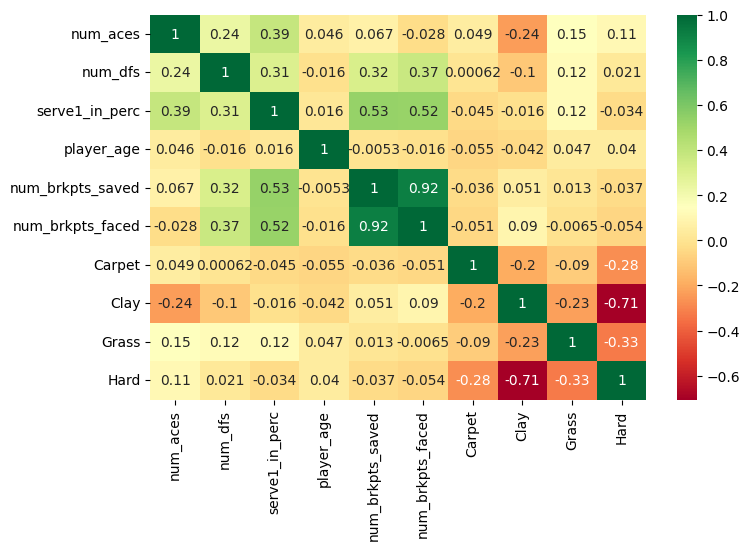

In [58]:
plt.subplots(figsize=(8, 5))
sns.heatmap(X.corr(), annot=True, cmap="RdYlGn")
plt.show()

### Model 1: Logistic Regression

In [59]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='liblinear', random_state=0)
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [60]:
#Check for overfitting
from sklearn.metrics import accuracy_score

#values are close so no issue with overfitting
print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.7788
Test set score: 0.7786


<AxesSubplot: >

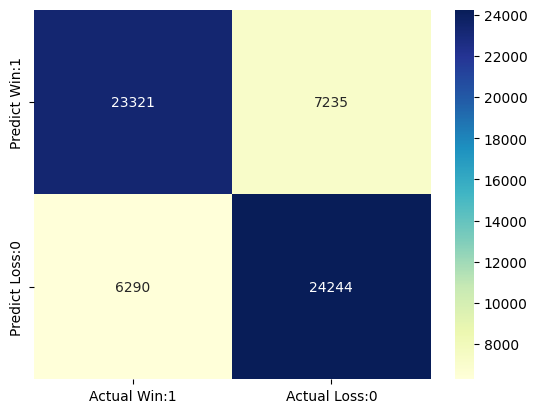

In [61]:
from sklearn.metrics import confusion_matrix

y_pred_test = logreg.predict(X_test)
cm = confusion_matrix(y_test, y_pred_test)

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Win:1', 'Actual Loss:0'], 
                                 index=['Predict Win:1', 'Predict Loss:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

<AxesSubplot: ylabel='Feature'>

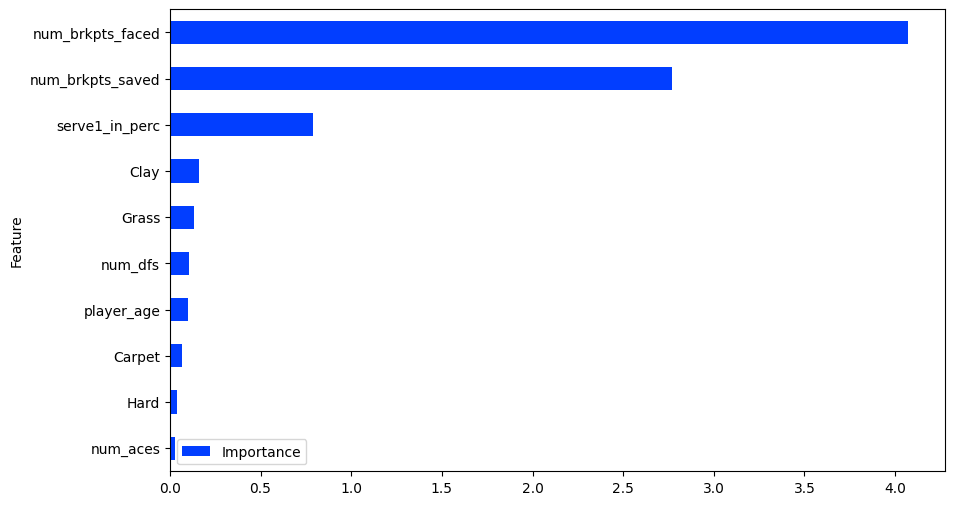

In [62]:
#Feature importance - can we get rid of any of the features?
coefficients = logreg.coef_[0]
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

In [63]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

         0.0       0.79      0.76      0.78     30556
         1.0       0.77      0.79      0.78     30534

    accuracy                           0.78     61090
   macro avg       0.78      0.78      0.78     61090
weighted avg       0.78      0.78      0.78     61090



In [64]:
# Applying 5-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(logreg, X_train, y_train, cv = 5, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.7783507  0.77957838 0.77592255 0.78192086 0.77679949]


In [65]:
# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.7785


## Model 2: Random Forest

In [66]:
from sklearn.ensemble import RandomForestClassifier

#Choose features and response
y = model_df['outcome']
X = model_df[['num_aces','num_dfs','serve1_in_perc','player_age','surface','num_brkpts_saved','num_brkpts_faced']]

#One Hot Encode surface
one_hot = pd.get_dummies(X['surface'])
X = X.drop('surface',axis=1)
X = X.join(one_hot)


scale = StandardScaler()
scaledX = scale.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(scaledX, y, test_size=0.30, random_state=42)


rf = RandomForestClassifier(n_estimators=1000, oob_score=True, max_features=None, max_depth = 5)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features=None, n_estimators=1000,
                       oob_score=True)

In [67]:
#Check for overfitting
from sklearn.metrics import accuracy_score

#values are not close so overfitting is for sure happening
print('Training set score: {:.4f}'.format(rf.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(rf.score(X_test, y_test)))

Training set score: 0.7615
Test set score: 0.7607


<AxesSubplot: >

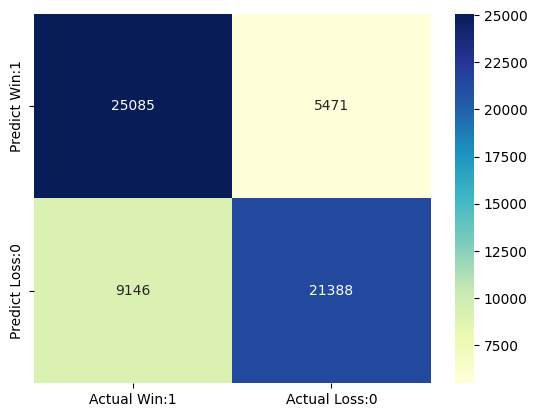

In [68]:
y_pred_test = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred_test)

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Win:1', 'Actual Loss:0'], 
                                 index=['Predict Win:1', 'Predict Loss:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [69]:
import time

start_time = time.time()
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.059 seconds


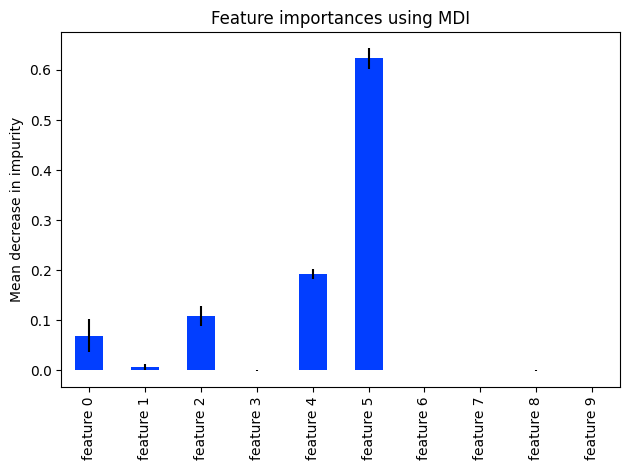

In [70]:
feature_names = [f"feature {i}" for i in range(X.shape[1])]

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [71]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

         0.0       0.73      0.82      0.77     30556
         1.0       0.80      0.70      0.75     30534

    accuracy                           0.76     61090
   macro avg       0.76      0.76      0.76     61090
weighted avg       0.76      0.76      0.76     61090



In [72]:
# Applying 5-Fold Cross Validation
scores = cross_val_score(rf, X_train, y_train, cv = 5, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))

#Compute Average cross-validation score
print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Cross-validation scores:[0.75979515 0.76067207 0.75385857 0.76227726 0.76248772]
Average cross-validation score: 0.7598


## Model 3: XGBoost

In [73]:
from xgboost import XGBClassifier

#Choose features and response
y = model_df['outcome']
X = model_df[['num_aces','num_dfs','serve1_in_perc','player_age','surface','num_brkpts_saved','num_brkpts_faced']]

#One Hot Encode surface
one_hot = pd.get_dummies(X['surface'])
X = X.drop('surface',axis=1)
X = X.join(one_hot)


scale = StandardScaler()
scaledX = scale.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(scaledX, y, test_size=0.30, random_state=42)


xgb_class = XGBClassifier()
xgb_class.fit(X_train, y_train, verbose = False, early_stopping_rounds=15,eval_set=[(X_test,y_test)])

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [74]:
predictions = xgb_class.predict(X_test)

print('Training set score: {:.4f}'.format(xgb_class.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(xgb_class.score(X_test, y_test)))

Training set score: 0.8137
Test set score: 0.8013


<AxesSubplot: >

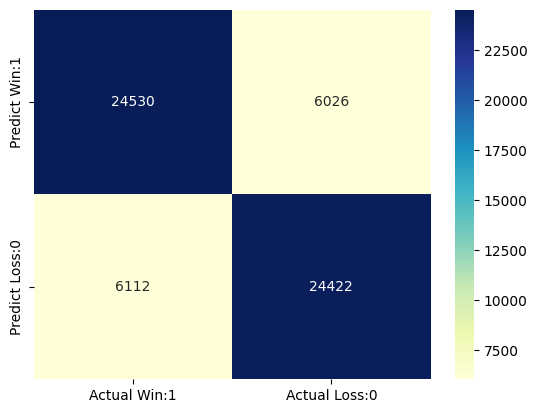

In [75]:
y_pred_test = xgb_class.predict(X_test)
cm = confusion_matrix(y_test, y_pred_test)

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Win:1', 'Actual Loss:0'], 
                                 index=['Predict Win:1', 'Predict Loss:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [76]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

         0.0       0.80      0.80      0.80     30556
         1.0       0.80      0.80      0.80     30534

    accuracy                           0.80     61090
   macro avg       0.80      0.80      0.80     61090
weighted avg       0.80      0.80      0.80     61090



In [77]:
# Applying 5-Fold Cross Validation
scores = cross_val_score(xgb_class, X_train, y_train, cv = 5, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))

#Compute Average cross-validation score
print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Cross-validation scores:[0.79999298 0.80381634 0.80198541 0.80131893 0.80286235]
Average cross-validation score: 0.8020


## Let's try surface-specific models

#### Grass Model

In [78]:
#Filter data however you see fit
grass = model_df[(model_df['player_age'].notnull()) & (model_df['surface']=="Grass")]

#Choose features and response
y = grass['outcome']
X = grass[['num_aces','num_dfs','serve1_in_perc','player_age','num_brkpts_saved','num_brkpts_faced']]

scale = StandardScaler()
scaledX = scale.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(scaledX, y, test_size=0.30, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(13755, 6)
(13755,)
(5896, 6)
(5896,)


In [79]:
logreg = LogisticRegression(solver='liblinear', random_state=0)
logreg.fit(X_train, y_train)

print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.7752
Test set score: 0.7787


<AxesSubplot: ylabel='Feature'>

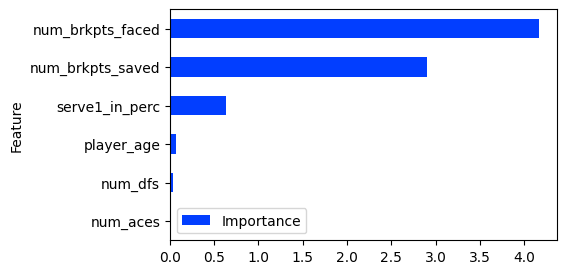

In [80]:
#Feature importance - can we get rid of any of the features?
coefficients = logreg.coef_[0]
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(5, 3))

### Clay Model

In [81]:
#Filter data however you see fit
clay = model_df[(model_df['player_age'].notnull()) & (model_df['surface']=="Clay")]

#Choose features and response
y = clay['outcome']
X = clay[['num_aces','num_dfs','serve1_in_perc','player_age','num_brkpts_saved','num_brkpts_faced']]

scale = StandardScaler()
scaledX = scale.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(scaledX, y, test_size=0.30, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(47509, 6)
(47509,)
(20361, 6)
(20361,)


In [82]:
logreg = LogisticRegression(solver='liblinear', random_state=0)
logreg.fit(X_train, y_train)

print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.7852
Test set score: 0.7899


<AxesSubplot: ylabel='Feature'>

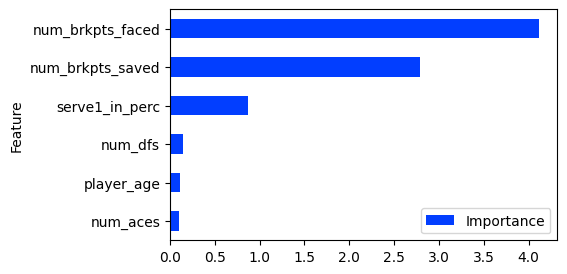

In [83]:
#Feature importance - can we get rid of any of the features?
coefficients = logreg.coef_[0]
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(5, 3))

### Hard Court Model

In [84]:
#Filter data however you see fit
hard = model_df[(model_df['player_age'].notnull()) & (model_df['surface']=="Hard")]

#Choose features and response
y = hard['outcome']
X = hard[['num_aces','num_dfs','serve1_in_perc','player_age','num_brkpts_saved','num_brkpts_faced']]

scale = StandardScaler()
scaledX = scale.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(scaledX, y, test_size=0.30, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(71195, 6)
(71195,)
(30513, 6)
(30513,)


In [85]:
logreg = LogisticRegression(solver='liblinear', random_state=0)
logreg.fit(X_train, y_train)

print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.7793
Test set score: 0.7734


<AxesSubplot: ylabel='Feature'>

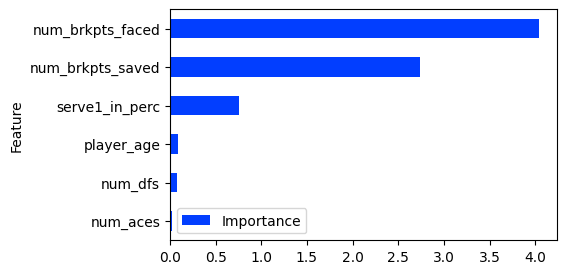

In [86]:
#Feature importance - can we get rid of any of the features?
coefficients = logreg.coef_[0]
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(5, 3))

# Ensemble Modeling
#### Reference 1: https://www.kaggle.com/code/pavansanagapati/ensemble-learning-techniques-tutorial
#### Reference 2: https://www.kaggle.com/code/vipulgandhi/a-comprehensive-guide-to-ensemble-learning
#### Reference 3: https://www.kaggle.com/code/odaymourad/detailed-and-typical-solution-ensemble-modeling

In [87]:
#Choose features and response
y = model_df['outcome']
X = model_df[['num_aces','num_dfs','serve1_in_perc','player_age','surface','num_brkpts_saved','num_brkpts_faced']]

#One Hot Encode surface
one_hot = pd.get_dummies(X['surface'])
X = X.drop('surface',axis=1)
X = X.join(one_hot)


scale = StandardScaler()
scaledX = scale.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(scaledX, y, test_size=0.30, random_state=42)

In [88]:
#Cross validate model with Kfold stratified cross val
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
kfold = StratifiedKFold(n_splits=8)

In [89]:
#Modeling step Test differents algorithms 
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

random_state = 2
classifiers = []
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(XGBClassifier(random_state=random_state))
classifiers.append(LogisticRegression(random_state = random_state))


cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = y_train, scoring = "accuracy", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,
                       "CrossValerrors": cv_std,
                       "Algorithm":["RandomForest","XGBoost","LogisticRegression"]})

/Users/jonzimmerman/anaconda3/lib/python3.9/site-packages/xgboost/data.py:427: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/jonzimmerman/anaconda3/lib/python3.9/site-packages/xgboost/data.py:427: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/jonzimmerman/anaconda3/lib/python3.9/site-packages/xgboost/data.py:427: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/jonzimmerman/anaconda3/lib/python3.9/site-packages/xgboost/data.py:427: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/jonzimmerman/anaconda3/lib/python3.9/site-packages/xgboost/data.p

In [90]:
cv_res

,CrossValMeans,CrossValerrors,Algorithm
0,0.788764,0.001263,RandomForest
1,0.800768,0.001399,XGBoost
2,0.778388,0.002092,LogisticRegression


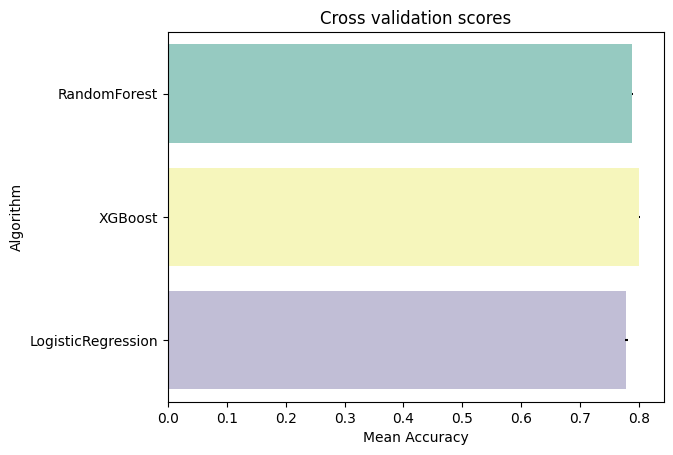

In [91]:
g = sns.barplot(data = cv_res, y = 'Algorithm',x ='CrossValMeans', palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

#### RFC Parameter tuning

In [92]:
RFC = RandomForestClassifier()


## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              "max_features": [1, 3],
              "min_samples_split": [2],
              "min_samples_leaf": [1, 3],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}

gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsRFC.fit(X_train,y_train)

RFC_best = gsRFC.best_estimator_

# Best score
gsRFC.best_score_

Fitting 8 folds for each of 8 candidates, totalling 64 fits


0.793801146816634

#### Logistic regression tuning

In [93]:
LR = LogisticRegression()

## Search grid for optimal parameters
lr_param_grid = {
    "C":np.logspace(-3,3,7), 
    "penalty":["l1","l2"]
}

gsLR = GridSearchCV(LR,param_grid = lr_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsLR.fit(X_train,y_train)

LR_best = gsLR.best_estimator_

# Best score
gsLR.best_score_

Fitting 8 folds for each of 14 candidates, totalling 112 fits


0.7789142771038867

#### XGBoost tuning

In [94]:
XGB = XGBClassifier()
xgb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4],
              #'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }

gsXGB = GridSearchCV(XGB, param_grid = xgb_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsXGB.fit(X_train,y_train)

xgb_best = gsXGB.best_estimator_

# Best score
gsXGB.best_score_

Fitting 8 folds for each of 12 candidates, totalling 96 fits


/Users/jonzimmerman/anaconda3/lib/python3.9/site-packages/xgboost/data.py:427: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/jonzimmerman/anaconda3/lib/python3.9/site-packages/xgboost/data.py:427: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/jonzimmerman/anaconda3/lib/python3.9/site-packages/xgboost/data.py:427: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/jonzimmerman/anaconda3/lib/python3.9/site-packages/xgboost/data.py:427: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/jonzimmerman/anaconda3/lib/python3.9/site-packages/xgboost/data.p

/Users/jonzimmerman/anaconda3/lib/python3.9/site-packages/xgboost/data.py:427: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/jonzimmerman/anaconda3/lib/python3.9/site-packages/xgboost/data.py:427: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/jonzimmerman/anaconda3/lib/python3.9/site-packages/xgboost/data.py:427: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/jonzimmerman/anaconda3/lib/python3.9/site-packages/xgboost/data.py:427: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/jonzimmerman/anaconda3/lib/python3.9/site-packages/xgboost/data.p

/Users/jonzimmerman/anaconda3/lib/python3.9/site-packages/xgboost/data.py:427: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/jonzimmerman/anaconda3/lib/python3.9/site-packages/xgboost/data.py:427: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/jonzimmerman/anaconda3/lib/python3.9/site-packages/xgboost/data.py:427: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/jonzimmerman/anaconda3/lib/python3.9/site-packages/xgboost/data.py:427: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/jonzimmerman/anaconda3/lib/python3.9/site-packages/xgboost/data.p

[17:02:09] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "loss", "max_features" } are not used.



0.8006833059786758

[16:59:43] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "loss", "max_features" } are not used.

[16:59:47] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "loss", "max_features" } are not used.

[16:59:51] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "loss", "max_features" } are not used.

[16:59:59] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "loss", "max_features" } are not used.

[17:00:07] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "loss", "max_features" } are not used.

[17:00:11] WARNING: /Users/run

/Users/jonzimmerman/anaconda3/lib/python3.9/site-packages/xgboost/data.py:427: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/jonzimmerman/anaconda3/lib/python3.9/site-packages/xgboost/data.py:427: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/jonzimmerman/anaconda3/lib/python3.9/site-packages/xgboost/data.py:427: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/jonzimmerman/anaconda3/lib/python3.9/site-packages/xgboost/data.py:427: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/jonzimmerman/anaconda3/lib/python3.9/site-packages/xgboost/data.p

/Users/jonzimmerman/anaconda3/lib/python3.9/site-packages/xgboost/data.py:427: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/jonzimmerman/anaconda3/lib/python3.9/site-packages/xgboost/data.py:427: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/jonzimmerman/anaconda3/lib/python3.9/site-packages/xgboost/data.py:427: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/jonzimmerman/anaconda3/lib/python3.9/site-packages/xgboost/data.py:427: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


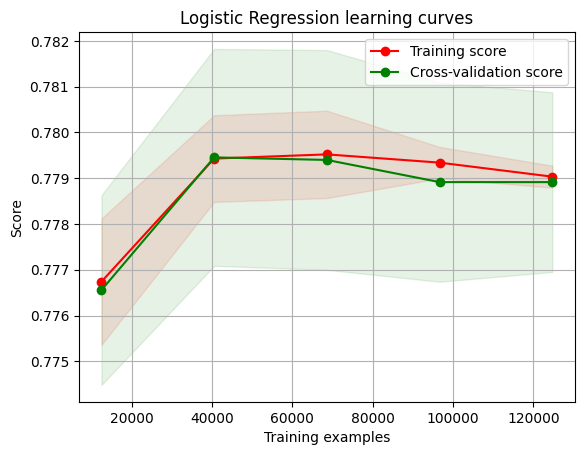

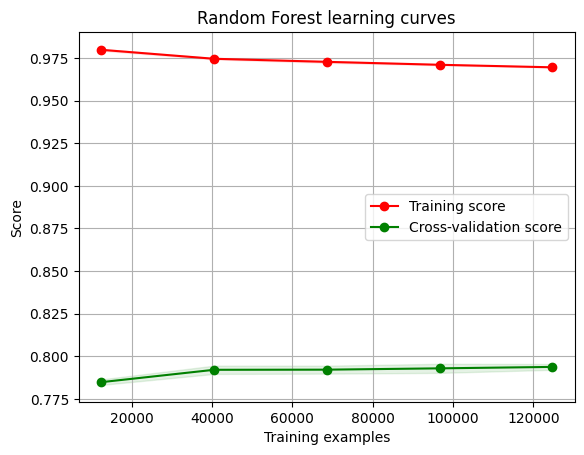

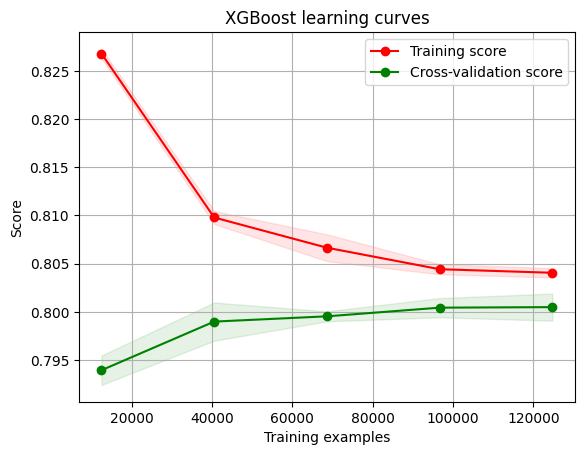

In [95]:
def plot_learning_curve(estimator, 
                        title, X, y, 
                        ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

g = plot_learning_curve(gsLR.best_estimator_,"Logistic Regression learning curves", X_train, y_train, cv = kfold)
g = plot_learning_curve(gsRFC.best_estimator_,"Random Forest learning curves", X_train, y_train, cv = kfold)
g = plot_learning_curve(gsXGB.best_estimator_,"XGBoost learning curves", X_train, y_train, cv = kfold)

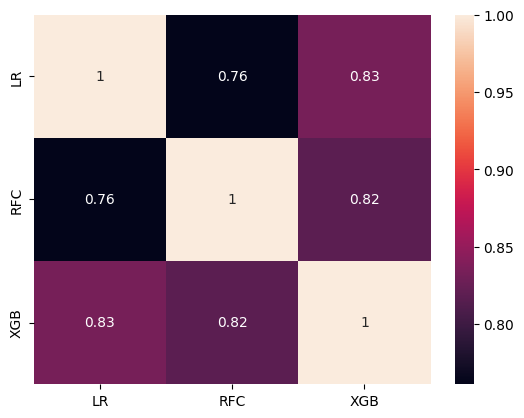

In [96]:
test_win_LR = pd.Series(LR_best.predict(X_test), name="LR")
test_win_RFC = pd.Series(RFC_best.predict(X_test), name="RFC")
test_win_XGB = pd.Series(xgb_best.predict(X_test), name="XGB")


# Concatenate all classifier results
ensemble_results = pd.concat([test_win_LR,
                              test_win_RFC,
                              test_win_XGB
                              ],axis=1)

g = sns.heatmap(ensemble_results.corr(),annot=True)

In [97]:
from sklearn.ensemble import VotingClassifier
votingC = VotingClassifier(estimators=[
    ('lr', LR_best),
    ('rfc', RFC_best), 
    ('xgb', xgb_best)
], voting='soft', n_jobs=4)

votingC = votingC.fit(X_train, y_train)

[17:05:21] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "loss", "max_features" } are not used.

[17:05:30] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "loss", "max_features" } are not used.

[17:05:47] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "loss", "max_features" } are not used.

[17:05:21] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "loss", "max_features" } are not used.

[17:05:23] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "loss", "max_features" } are not used.

[17:05:34] WARNING: /Users/run

In [98]:
votingC

VotingClassifier(estimators=[('lr', LogisticRegression(C=0.01)),
                             ('rfc',
                              RandomForestClassifier(bootstrap=False,
                                                     max_features=3,
                                                     min_samples_leaf=3,
                                                     n_estimators=300)),
                             ('xgb',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            callbacks=None, colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metri...
                                            gpu_id=-1, grow_policy='depthwise',
                                            importance_type=None,
                                            interaction_constraints='',
                                            learning_rate=0.1, loss='deviance',
                                            max_bin=256, max_cat_threshold=64,
                                            max_cat_to_onehot=4,
                                            max_delta_step=0, max_depth=4,
                                            max_features=0.3, max_leaves=0,
                                            min_child_weight=1, missing=nan,
                                            monotone_constraints='()',
                                            n_estimators=200, n_jobs=0,
                                            num_parallel_tree=1, ...))],
                 n_jobs=4, voting='soft')

In [99]:
test_win = pd.Series(votingC.predict(X_test), name="win")
test_win.value_counts()

win
1.0    30659
0.0    30431
Name: count, dtype: int64